In [44]:
import numpy as np
import pandas as pd
import seaborn as sns
import ast, json
from scipy import stats
import missingno
from datetime import datetime
%matplotlib inline
import matplotlib.pyplot as plt
from os import path
from PIL import Image
%pip install wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

     -------------------------------------- 153.1/153.1 kB 9.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [3]:
wine_df = pd.read_csv('wine.csv')
wine_df

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selecci√≥n Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodr√≠guez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La B√©gude, named af...",La Br√ªlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la B√©gude
...,...,...,...,...,...,...,...,...,...,...,...
1098,1098,US,Subdued is a good way to describe this light-b...,NaN,87,12.0,California,California,California Other,White Blend,Kitchen Sink
1099,1099,US,"While spry and dry in style, fragrant apricot ...",Hobbit Hollow Farm Dry,87,20.0,New York,Finger Lakes,Finger Lakes,Riesling,Heron Hill
1100,1100,US,Coming from the cool 2011 vintage this wine of...,Cold Creek Vineyard,87,28.0,Washington,Columbia Valley (WA),Columbia Valley,Merlot,Chateau Ste. Michelle
1101,1101,France,"This concentrated, structured wine has an eart...",NaN,87,27.0,Bordeaux,Listrac-M√©doc,NaN,Bordeaux-style Red Blend,Ch√¢teau Vieux Moulin


In [4]:
wine_df.drop_duplicates()
wine_df

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selecci√≥n Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodr√≠guez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La B√©gude, named af...",La Br√ªlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la B√©gude
...,...,...,...,...,...,...,...,...,...,...,...
1098,1098,US,Subdued is a good way to describe this light-b...,NaN,87,12.0,California,California,California Other,White Blend,Kitchen Sink
1099,1099,US,"While spry and dry in style, fragrant apricot ...",Hobbit Hollow Farm Dry,87,20.0,New York,Finger Lakes,Finger Lakes,Riesling,Heron Hill
1100,1100,US,Coming from the cool 2011 vintage this wine of...,Cold Creek Vineyard,87,28.0,Washington,Columbia Valley (WA),Columbia Valley,Merlot,Chateau Ste. Michelle
1101,1101,France,"This concentrated, structured wine has an eart...",NaN,87,27.0,Bordeaux,Listrac-M√©doc,NaN,Bordeaux-style Red Blend,Ch√¢teau Vieux Moulin


<AxesSubplot:>

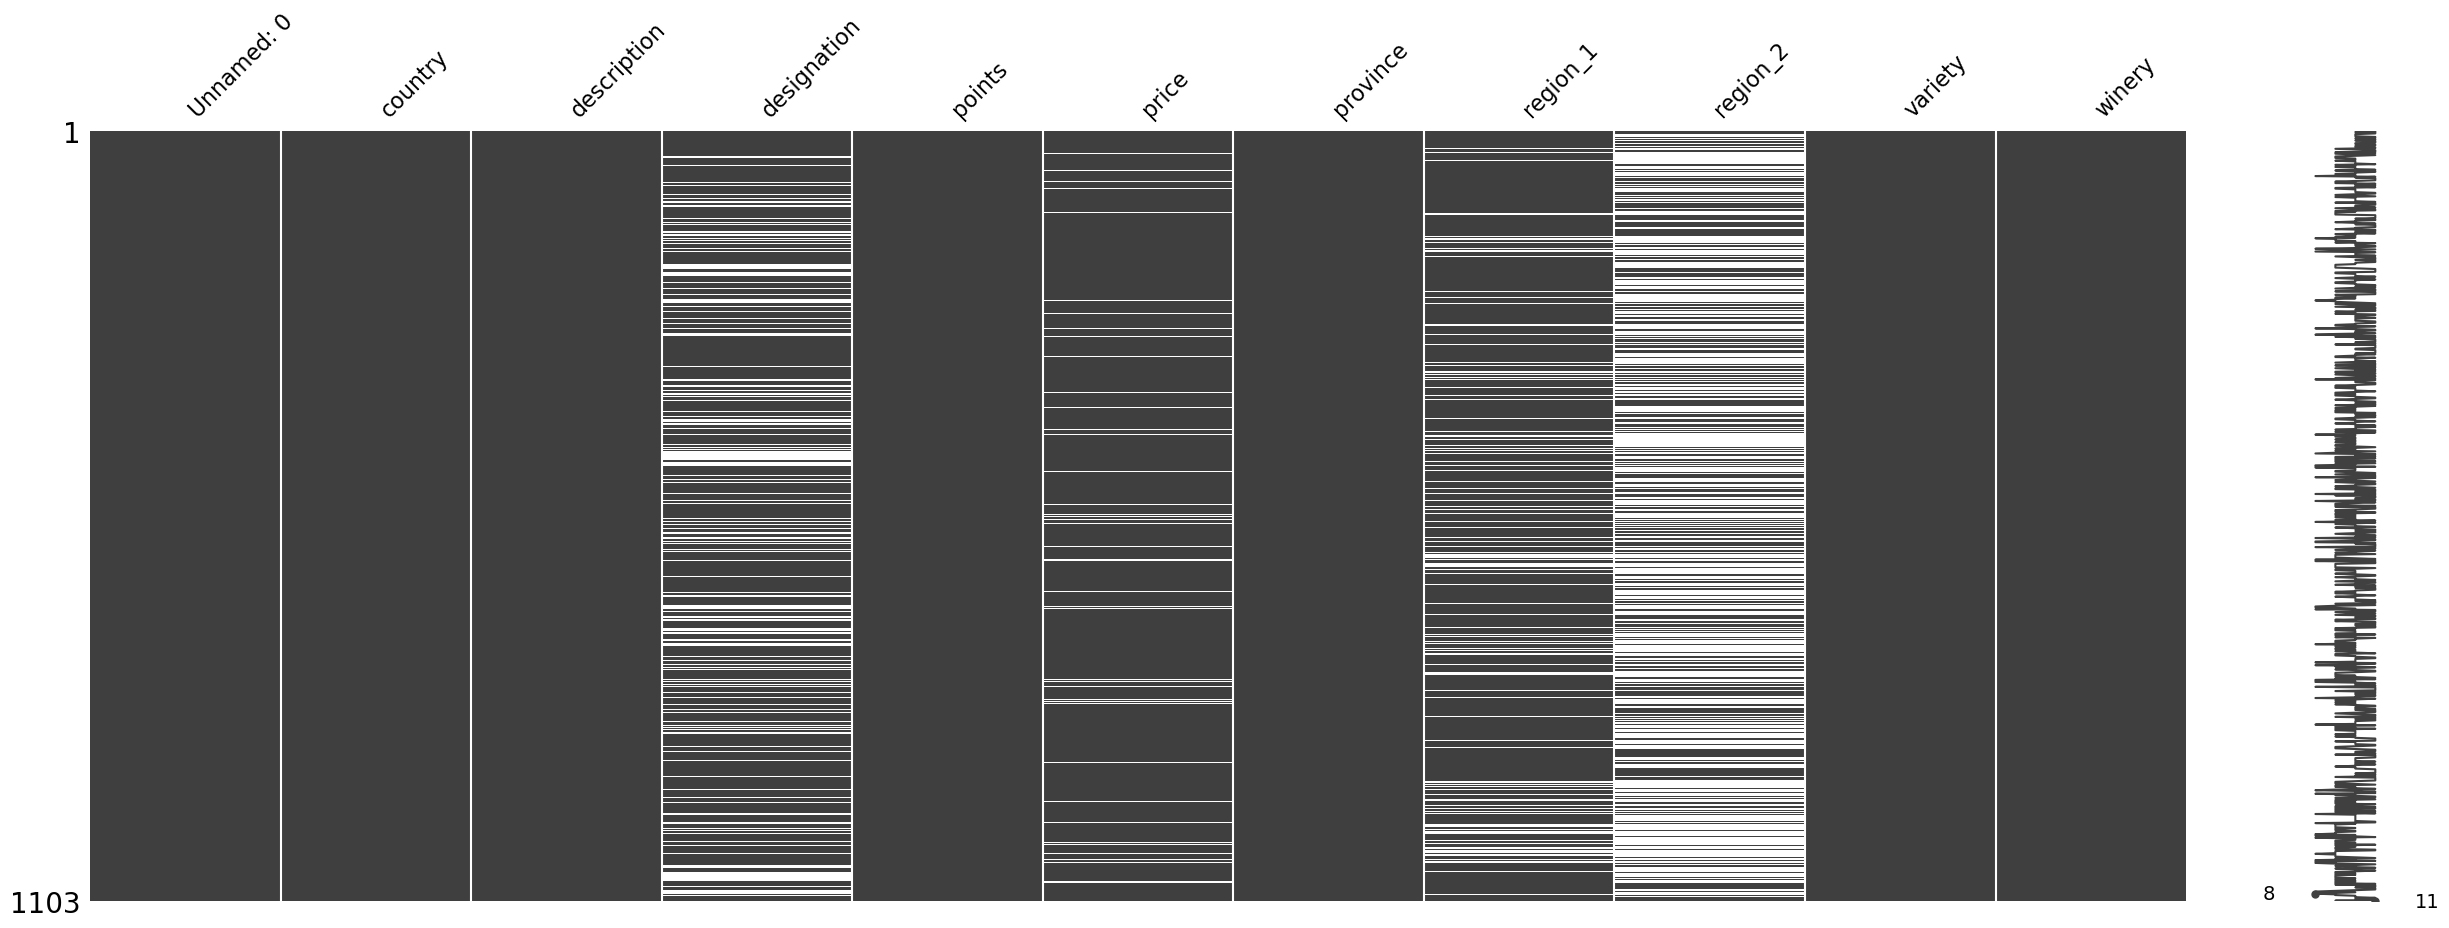

In [16]:
missingno.matrix(wine_df, figsize = (30,10))

 # As we can see there are missing values, mostly in designation, price, and regions. As these missing values will not greatly impact our exploration or our word clouds, I will not change them.

In [5]:
print(wine_df.dtypes)

Unnamed: 0       int64
country         object
description     object
designation     object
points           int64
price          float64
province        object
region_1        object
region_2        object
variety         object
winery          object
dtype: object


<AxesSubplot:>

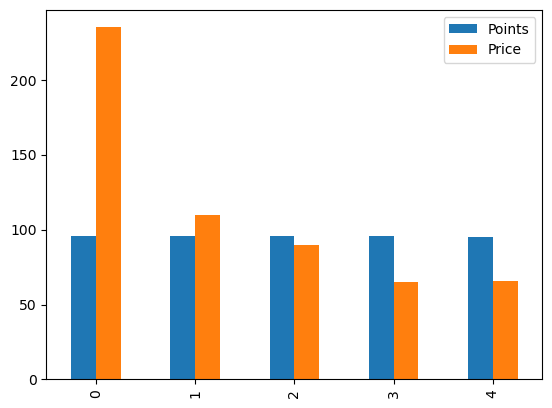

In [7]:
wine_data_series = wine_df.iloc[5:5,1]


## we will assemble a DataFrame of only the relevant features to plot  
features_of_interest = pd.DataFrame({'Points': wine_df['points'],
                                     'Price': wine_df['price'],
                                   }
                                   )

## Let us plot a few of the manufactures for visibility
features_of_interest = features_of_interest.iloc[:5,]
features_of_interest.plot(kind='bar')

In [11]:
sorted = wine_df.sort_values(by='price', ascending=False)
sorted.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
898,898,Italy,"Aromas of crushed plum, asphalt, oak, toast, e...",Sor√¨ Tildin,92,500.0,Piedmont,Langhe,NaN,Red Blend,Gaja
16,16,US,"This blockbuster, powerhouse of a wine suggest...",Rainin Vineyard,95,325.0,California,Diamond Mountain District,Napa,Cabernet Sauvignon,Hall
18,18,France,Coming from a seven-acre vineyard named after ...,Le Pigeonnier,95,290.0,Southwest France,Cahors,NaN,Malbec,Ch√¢teau Lagr√©zette
954,954,Italy,"Dense and concentrated, this blend of 66% Cabe...",NaN,89,240.0,Tuscany,Toscana,NaN,Red Blend,Tenuta di Trinoro
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz


In [12]:
sorted.tail()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
1075,1075,France,"This is a fresh, lemony wine, crisp and steely...",Eclat de Fra√Æcheur,88,NaN,Loire Valley,Sancerre,NaN,Sauvignon Blanc,Roger et Didier Raimbault
1076,1076,Italy,"Sweet vanilla, oak, espresso, coconut and plum...",Audace Riserva,88,NaN,Piedmont,Barolo,NaN,Nebbiolo,Sarotto
1078,1078,Italy,"Aromas of ripe plum, rose petals, cake spices ...",Chirlet,88,NaN,Piedmont,Barolo,NaN,Nebbiolo,Simone Scaletta
1088,1088,France,While the wine has plenty of the tannins typic...,NaN,87,NaN,Bordeaux,M√©doc,NaN,Bordeaux-style Red Blend,Ch√¢teau de Bensse
1091,1091,France,This firm and dry wine is also full of acidity...,NaN,87,NaN,Bordeaux,Pessac-L√©ognan,NaN,Bordeaux-style Red Blend,Ch√¢teau Manc√®dre


In [13]:
sorted_country = wine_df.sort_values(by=['country', 'price'], ascending=False)
sorted_country

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
16,16,US,"This blockbuster, powerhouse of a wine suggest...",Rainin Vineyard,95,325.0,California,Diamond Mountain District,Napa,Cabernet Sauvignon,Hall
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
231,231,US,"From a seven-acre section of the vineyard, thi...",Red Rock Terrace,93,200.0,California,Napa Valley,Napa,Cabernet Sauvignon,Diamond Creek
14,14,US,"With its sophisticated mix of mineral, acid an...",Grace Vineyard,95,185.0,Oregon,Dundee Hills,Willamette Valley,Pinot Noir,Domaine Serene
313,313,US,This impressive 100% varietal wine shows focus...,Outer Limits,94,155.0,California,Napa Valley,Napa,Cabernet Sauvignon,Parallel
...,...,...,...,...,...,...,...,...,...,...,...
111,111,Argentina,This copper-tinted ros√© of Pinot Noir smells ...,Terroir √önico Pinot Noir,86,12.0,Mendoza Province,Tupungato,NaN,Ros√©,Zorzal
1007,1007,Argentina,"A mix of blueberry, plum and animal aromas lea...",Punto Final MLB,85,12.0,Mendoza Province,Mendoza,NaN,Malbec,Bodega Renacer
1064,1064,Argentina,"Quara makes good, true Cafayate Torront√©s. Ar...",Estate Bottled,88,12.0,Other,Cafayate,NaN,Torront√©s,Quara
999,999,Argentina,Dusty plum and berry aromas are clean. In the ...,NaN,85,11.0,Mendoza Province,Mendoza,NaN,Malbec,Proemio


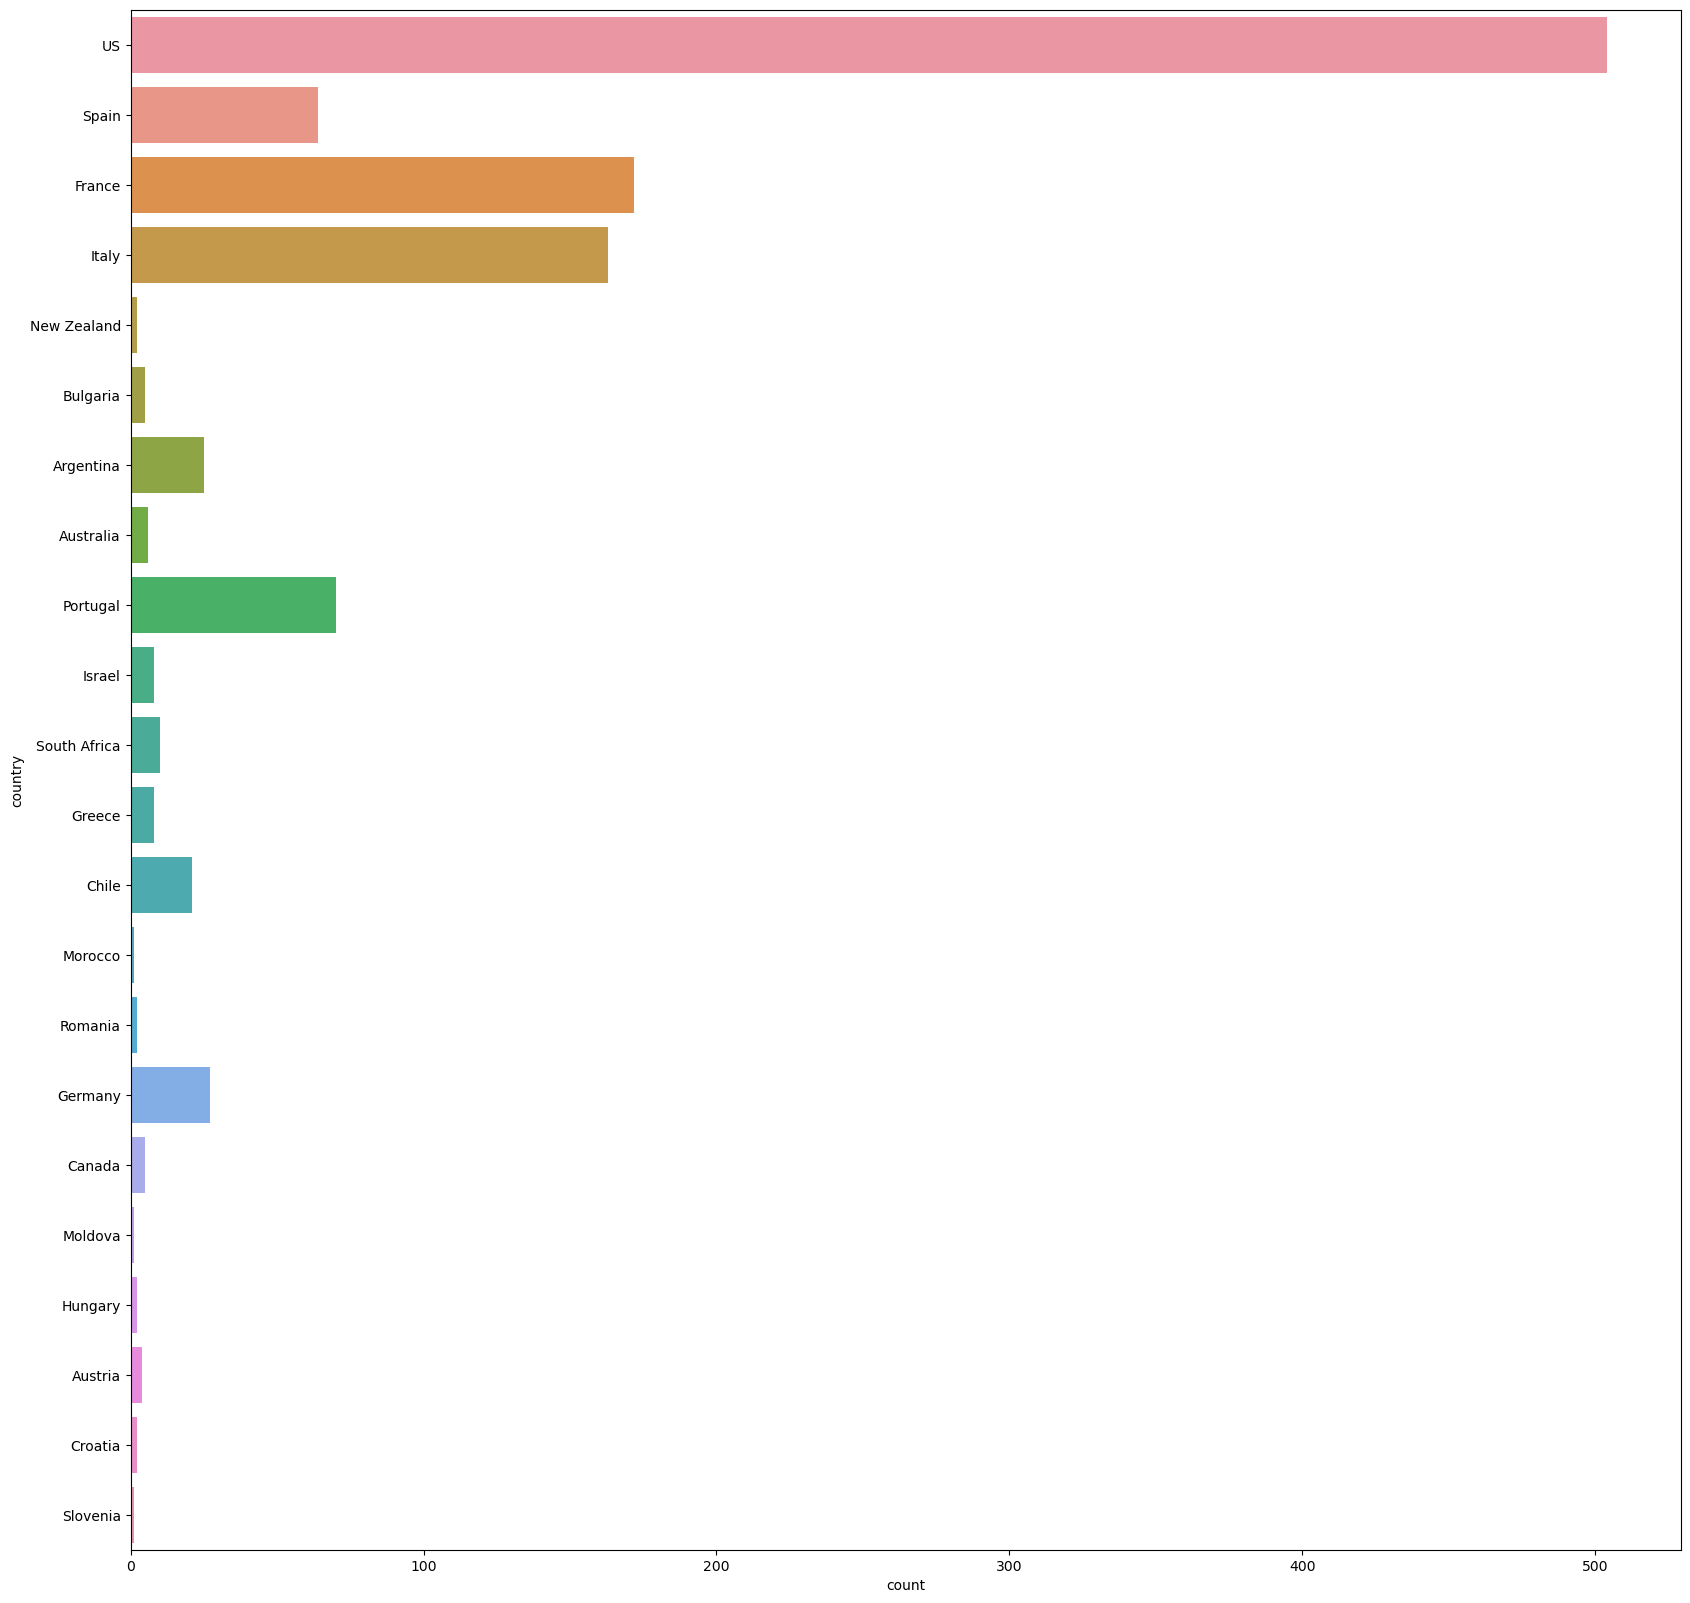

In [15]:
fig = plt.figure(figsize=(20,20))
sns.countplot(y=wine_df['country'], data=wine_df);

In [17]:
wine_df.describe()

,Unnamed: 0,points,price
count,1103.000000,1103.000000,1046.000000
mean,551.000000,89.701723,40.242830
std,318.552978,2.390405,32.588141
min,0.000000,85.000000,7.000000
25%,275.500000,88.000000,20.000000
50%,551.000000,90.000000,31.000000
75%,826.500000,91.000000,50.000000
max,1102.000000,96.000000,500.000000


In [18]:
binwidth = int((max(wine_df['price']) - min(wine_df['price']))/3)
bins = range(int(min(wine_df['price'])), int(max(wine_df['price'])), binwidth)
wine_df['price_cat']= pd.cut(wine_df['price'],bins, labels = ['Low', 'Medium', 'High'])
wine_df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery,price_cat
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz,Medium
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selecci√≥n Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodr√≠guez,Low
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley,Low
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi,Low
4,4,France,"This is the top wine from La B√©gude, named af...",La Br√ªlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la B√©gude,Low


In [19]:
country_ct = wine_df['country'].value_counts()
designation_ct = wine_df['designation'].value_counts()
points_ct = wine_df['points'].value_counts()
province_ct = wine_df['province'].value_counts()
region_1_ct = wine_df['region_1'].value_counts()
region_2_ct = wine_df['region_2'].value_counts()
variety_ct = wine_df['variety'].value_counts()
winery_ct = wine_df['winery'].value_counts()
price_cat_ct = wine_df['price_cat'].value_counts()

In [20]:
country_ct

US              504
France          172
Italy           163
Portugal         70
Spain            64
Germany          27
Argentina        25
Chile            21
South Africa     10
Greece            8
Israel            8
Australia         6
Bulgaria          5
Canada            5
Austria           4
Romania           2
New Zealand       2
Hungary           2
Croatia           2
Morocco           1
Moldova           1
Slovenia          1
Name: country, dtype: int64

In [21]:
designation_ct

Estate                                     13
Riserva                                    13
Reserva                                    11
Estate Grown                               10
Reserve                                     9
                                           ..
Grand Cru Blanc de Blancs Chouilly Brut     1
Garrafeira                                  1
Brut Ros√©                                  1
Rosella's Vineyard                          1
The Whip                                    1
Name: designation, Length: 714, dtype: int64

In [22]:
points_ct

90    294
91    140
89    120
87    104
88     99
92     81
93     75
86     65
85     55
94     45
95     21
96      4
Name: points, dtype: int64

In [23]:
province_ct

California              350
Oregon                   77
Tuscany                  67
Piedmont                 58
Washington               48
                       ... 
Atalanti Valley           1
Carnuntum                 1
Languedoc-Roussillon      1
Nahe                      1
Dealurile Munteniei       1
Name: province, Length: 100, dtype: int64

In [24]:
region_1_ct

Napa Valley               49
Barolo                    40
Willamette Valley         32
Paso Robles               27
Brunello di Montalcino    25
                          ..
Carmel Valley              1
Vino Spumante              1
Bergerac Sec               1
San Juan                   1
Listrac-M√©doc             1
Name: region_1, Length: 214, dtype: int64

In [25]:
region_2_ct

Central Coast              117
Sonoma                      81
Napa                        73
Willamette Valley           62
Columbia Valley             45
California Other            24
Mendocino/Lake Counties     18
Finger Lakes                15
Sierra Foothills            14
Napa-Sonoma                  9
Central Valley               9
Southern Oregon              7
Oregon Other                 7
South Coast                  3
Washington Other             3
North Coast                  2
Long Island                  2
New York Other               1
Name: region_2, dtype: int64

In [26]:
variety_ct

Pinot Noir                  128
Chardonnay                  103
Cabernet Sauvignon           89
Red Blend                    70
Nebbiolo                     54
                           ... 
Kekfrankos                    1
Vermentino                    1
Aglianico                     1
Semillon-Sauvignon Blanc      1
Fum√© Blanc                   1
Name: variety, Length: 124, dtype: int64

In [27]:
winery_ct

Caves Velhas          6
Wines & Winemakers    6
The Naked Grape       5
Bergstr√∂m            5
Global Wines          5
                     ..
Falua                 1
Finca Las Moras       1
Ramos-Pinto           1
Obelisco Estate       1
Murrieta's Well       1
Name: winery, Length: 846, dtype: int64

In [28]:
price_cat_ct

Low       1033
Medium       7
High         0
Name: price_cat, dtype: int64

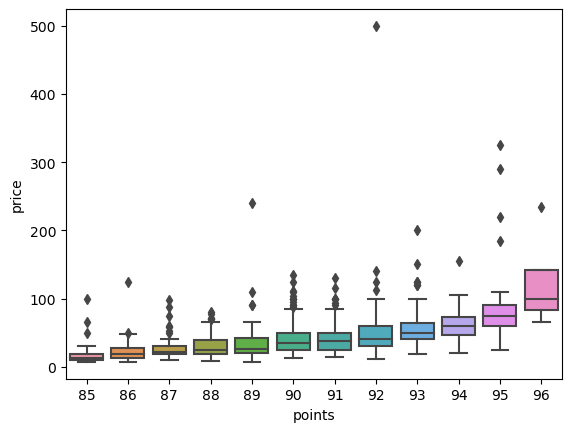

In [30]:
sns.boxplot(x = 'points', y='price', data = wine_df)
plt.show()

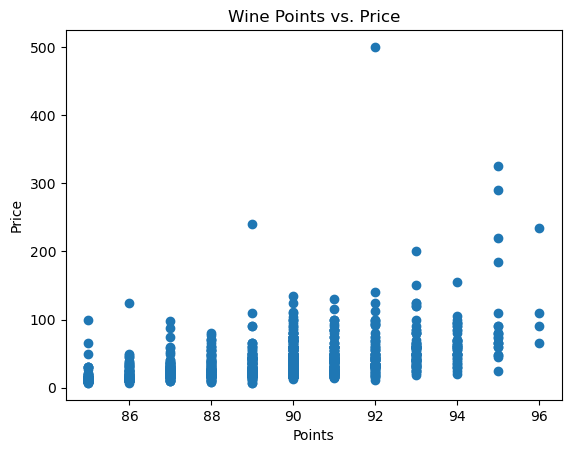

In [31]:
x = wine_df['points']
y = wine_df['price']
plt.scatter(x,y)
plt.title('Wine Points vs. Price')
plt.xlabel('Points')
plt.ylabel('Price')
plt.show()

In [32]:
wine_df_group = wine_df[['country', 'points', 'price']]
country_avg = wine_df_group.groupby(['country'], as_index = False).mean()
country_avg

,country,points,price
0,Argentina,87.280000,21.360000
1,Australia,89.500000,42.166667
2,Austria,93.000000,21.666667
3,Bulgaria,88.600000,17.600000
4,Canada,90.400000,33.600000
5,Chile,89.761905,35.714286
6,Croatia,88.000000,23.000000
7,France,89.563953,35.451389
8,Germany,90.518519,27.777778
9,Greece,89.250000,18.750000


In [33]:
group_avg = wine_df_group.groupby(['country', 'points'], as_index = False).mean()
group_avg

,country,points,price
0,Argentina,85,15.833333
1,Argentina,86,19.250000
2,Argentina,87,15.000000
3,Argentina,88,20.833333
4,Argentina,91,27.500000
...,...,...,...
86,US,92,49.307692
87,US,93,65.666667
88,US,94,69.607143
89,US,95,93.181818


In [34]:
pivot_table = group_avg.pivot(index='country', columns='points')
pivot_table

price                                              \
points               85         86         87         88         89   
country                                                               
Argentina     15.833333  19.250000  15.000000  20.833333        NaN   
Australia           NaN        NaN        NaN  33.500000        NaN   
Austria             NaN        NaN        NaN        NaN        NaN   
Bulgaria       9.000000        NaN        NaN  10.000000        NaN   
Canada              NaN        NaN        NaN        NaN        NaN   
Chile               NaN        NaN        NaN        NaN  24.000000   
Croatia             NaN        NaN        NaN  23.000000        NaN   
France        13.461538  14.142857  23.214286  22.600000  18.100000   
Germany             NaN        NaN        NaN        NaN  25.500000   
Greece              NaN        NaN        NaN        NaN  18.333333   
Hungary             NaN        NaN        NaN        NaN        NaN   
Israel        30.000000        NaN        NaN        NaN        NaN   
Italy          9.500000  27.333333  51.727273  54.000000  55.904762   
Moldova             NaN        NaN        NaN        NaN        NaN   
Morocco             NaN        NaN        NaN        NaN        NaN   
New Zealand         NaN        NaN        NaN        NaN        NaN   
Portugal      11.000000  13.600000        NaN  35.000000  22.700000   
Romania             NaN        NaN        NaN   9.000000        NaN   
Slovenia            NaN        NaN        NaN        NaN        NaN   
South Africa  15.500000  21.500000        NaN        NaN        NaN   
Spain         50.000000        NaN  19.900000  21.600000  28.900000   
US            30.600000  27.806452  23.745763  33.729167  35.227273   

                                                                     \
points               90         91         92         93         94   
country                                                               
Argentina           NaN  27.500000        NaN  40.000000  50.000000   
Australia     50.000000  36.000000        NaN        NaN        NaN   
Austria             NaN        NaN        NaN  21.666667        NaN   
Bulgaria      23.000000        NaN        NaN        NaN        NaN   
Canada        37.750000        NaN  17.000000        NaN        NaN   
Chile         24.000000  76.666667  53.333333        NaN        NaN   
Croatia             NaN        NaN        NaN        NaN        NaN   
France        36.200000  49.333333  47.750000  48.666667  47.250000   
Germany       31.777778  25.812500        NaN        NaN        NaN   
Greece        20.000000        NaN        NaN        NaN        NaN   
Hungary       35.000000        NaN  16.000000        NaN        NaN   
Israel        32.500000  32.500000        NaN        NaN        NaN   
Italy         51.793103  57.250000  90.153846  57.600000  46.750000   
Moldova       32.000000        NaN        NaN        NaN        NaN   
Morocco             NaN        NaN        NaN  35.000000        NaN   
New Zealand         NaN        NaN        NaN        NaN  57.000000   
Portugal      25.000000  32.705882  42.333333  48.000000        NaN   
Romania             NaN        NaN        NaN        NaN        NaN   
Slovenia      40.000000        NaN        NaN        NaN        NaN   
South Africa        NaN        NaN        NaN        NaN        NaN   
Spain         26.681818  27.000000        NaN  61.500000  68.000000   
US            39.526718  44.245614  49.307692  65.666667  69.607143   

                                 
points                95     96  
country                          
Argentina            NaN    NaN  
Australia            NaN    NaN  
Austria              NaN    NaN  
Bulgaria             NaN    NaN  
Canada               NaN    NaN  
Chile                NaN    NaN  
Croatia              NaN    NaN  
France        148.666667    NaN  
Germany              NaN    NaN  
Greece               NaN    NaN  
Hungary              NaN

In [35]:
pivot_table = pivot_table.fillna(0)
pivot_table

price                                              \
points               85         86         87         88         89   
country                                                               
Argentina     15.833333  19.250000  15.000000  20.833333   0.000000   
Australia      0.000000   0.000000   0.000000  33.500000   0.000000   
Austria        0.000000   0.000000   0.000000   0.000000   0.000000   
Bulgaria       9.000000   0.000000   0.000000  10.000000   0.000000   
Canada         0.000000   0.000000   0.000000   0.000000   0.000000   
Chile          0.000000   0.000000   0.000000   0.000000  24.000000   
Croatia        0.000000   0.000000   0.000000  23.000000   0.000000   
France        13.461538  14.142857  23.214286  22.600000  18.100000   
Germany        0.000000   0.000000   0.000000   0.000000  25.500000   
Greece         0.000000   0.000000   0.000000   0.000000  18.333333   
Hungary        0.000000   0.000000   0.000000   0.000000   0.000000   
Israel        30.000000   0.000000   0.000000   0.000000   0.000000   
Italy          9.500000  27.333333  51.727273  54.000000  55.904762   
Moldova        0.000000   0.000000   0.000000   0.000000   0.000000   
Morocco        0.000000   0.000000   0.000000   0.000000   0.000000   
New Zealand    0.000000   0.000000   0.000000   0.000000   0.000000   
Portugal      11.000000  13.600000   0.000000  35.000000  22.700000   
Romania        0.000000   0.000000   0.000000   9.000000   0.000000   
Slovenia       0.000000   0.000000   0.000000   0.000000   0.000000   
South Africa  15.500000  21.500000   0.000000   0.000000   0.000000   
Spain         50.000000   0.000000  19.900000  21.600000  28.900000   
US            30.600000  27.806452  23.745763  33.729167  35.227273   

                                                                     \
points               90         91         92         93         94   
country                                                               
Argentina      0.000000  27.500000   0.000000  40.000000  50.000000   
Australia     50.000000  36.000000   0.000000   0.000000   0.000000   
Austria        0.000000   0.000000   0.000000  21.666667   0.000000   
Bulgaria      23.000000   0.000000   0.000000   0.000000   0.000000   
Canada        37.750000   0.000000  17.000000   0.000000   0.000000   
Chile         24.000000  76.666667  53.333333   0.000000   0.000000   
Croatia        0.000000   0.000000   0.000000   0.000000   0.000000   
France        36.200000  49.333333  47.750000  48.666667  47.250000   
Germany       31.777778  25.812500   0.000000   0.000000   0.000000   
Greece        20.000000   0.000000   0.000000   0.000000   0.000000   
Hungary       35.000000   0.000000  16.000000   0.000000   0.000000   
Israel        32.500000  32.500000   0.000000   0.000000   0.000000   
Italy         51.793103  57.250000  90.153846  57.600000  46.750000   
Moldova       32.000000   0.000000   0.000000   0.000000   0.000000   
Morocco        0.000000   0.000000   0.000000  35.000000   0.000000   
New Zealand    0.000000   0.000000   0.000000   0.000000  57.000000   
Portugal      25.000000  32.705882  42.333333  48.000000   0.000000   
Romania        0.000000   0.000000   0.000000   0.000000   0.000000   
Slovenia      40.000000   0.000000   0.000000   0.000000   0.000000   
South Africa   0.000000   0.000000   0.000000   0.000000   0.000000   
Spain         26.681818  27.000000   0.000000  61.500000  68.000000   
US            39.526718  44.245614  49.307692  65.666667  69.607143   

                                 
points                95     96  
country                          
Argentina       0.000000    0.0  
Australia       0.000000    0.0  
Austria         0.000000    0.0  
Bulgaria        0.000000    0.0  
Canada          0.000000    0.0  
Chile           0.000000    0.0  
Croatia         0.000000    0.0  
France        148.666667    0.0  
Germany         0.000000    0.0  
Greece          0.000000    0.0  
Hungary         0.000000

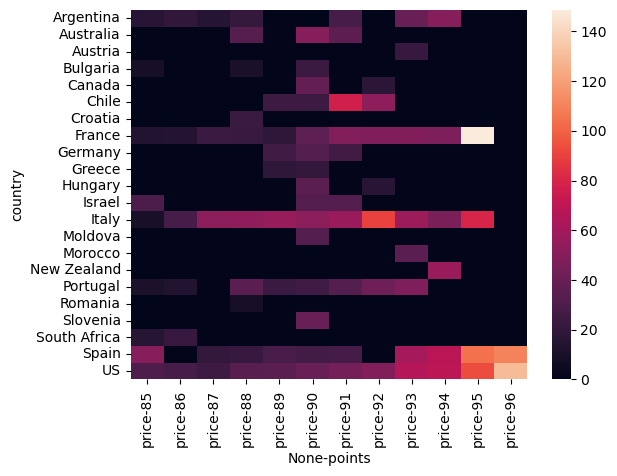

In [36]:
sns.heatmap(pivot_table)
plt.show()

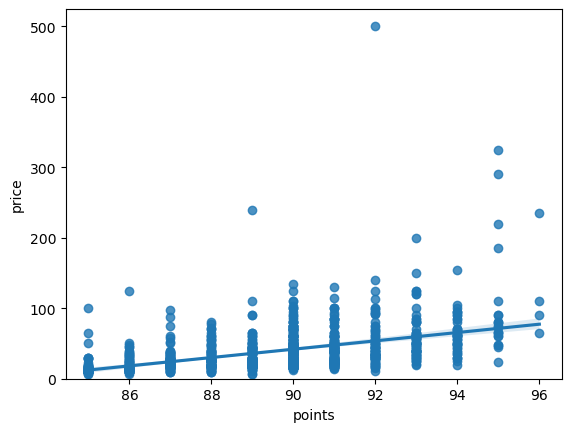

In [37]:
sns.regplot(x = 'points', y='price', data = wine_df)
plt.ylim(0,)
plt.show()

In [39]:
wine_df.corr()

,Unnamed: 0,points,price
Unnamed: 0,1.000000,-0.210785,-0.123029
points,-0.210785,1.000000,0.437145
price,-0.123029,0.437145,1.000000


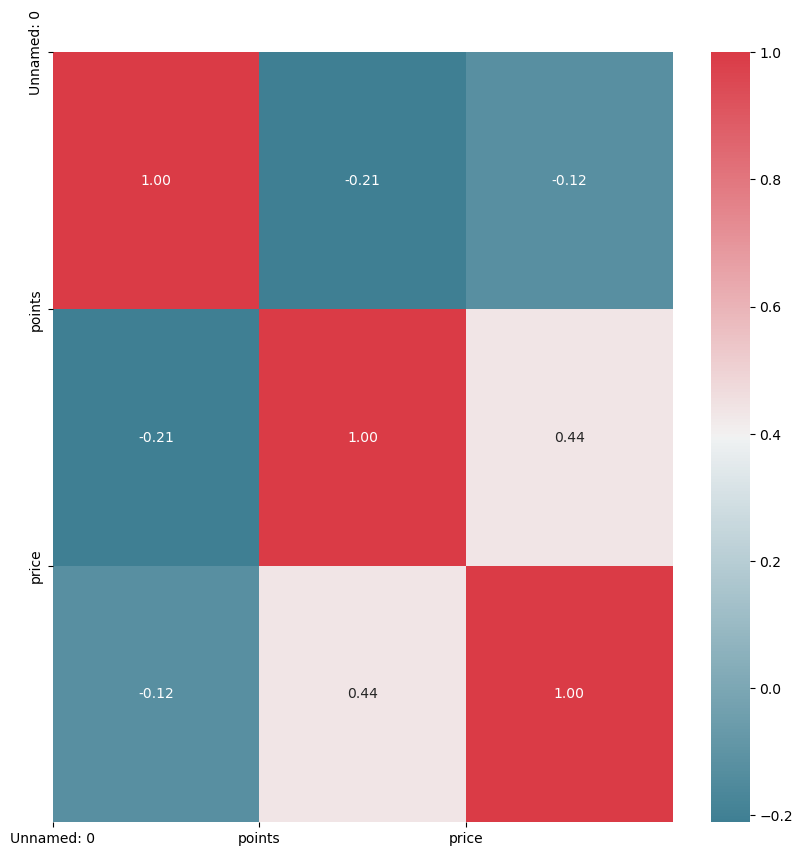

In [41]:
corr = wine_df.corr()
fig, ax = plt.subplots(figsize=(10, 10))
colormap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap = colormap, annot=True, fmt = ".2f")
plt.xticks(range(len(corr.columns)), corr.columns);
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()

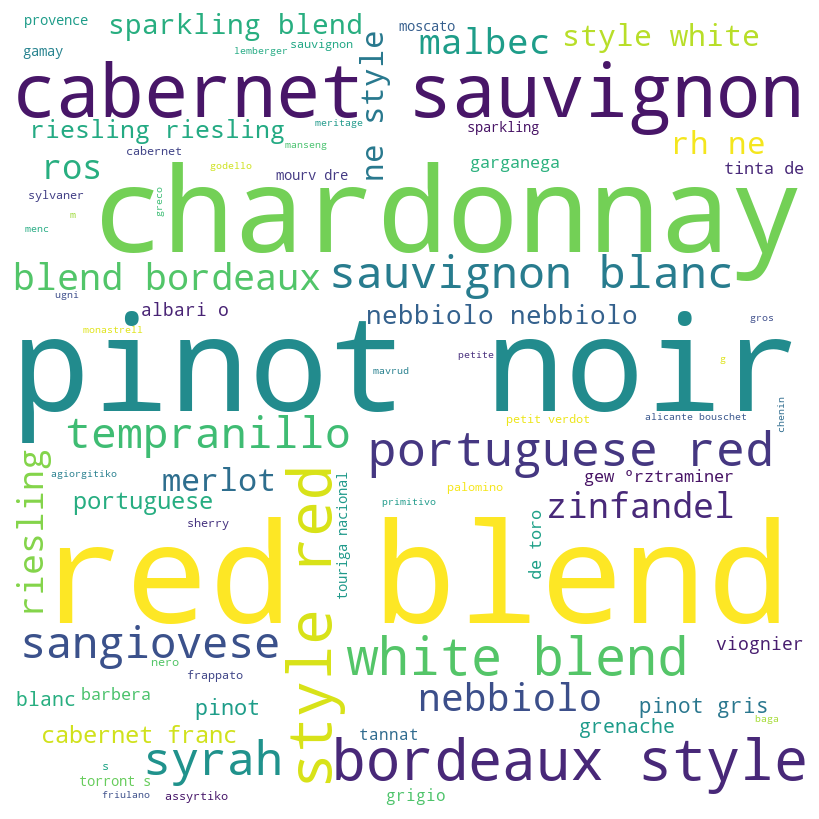

In [51]:
comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in wine_df['variety']:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

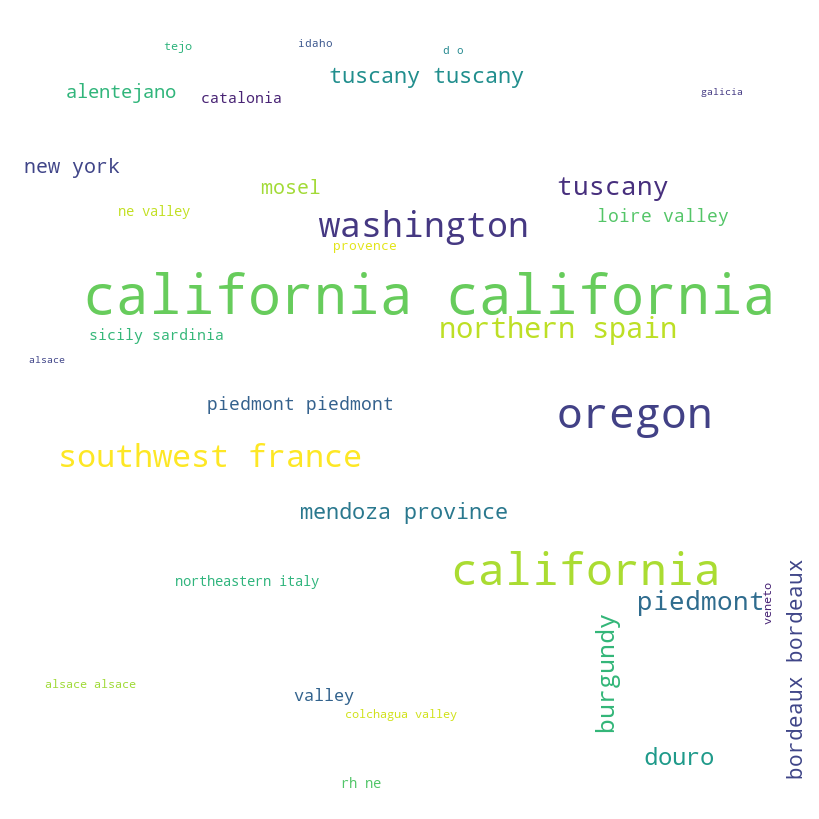

In [52]:
comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in wine_df['province']:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()